In [13]:
# This notebook explores the Breast Cancer dataset, trains a neural network, and visualizes the training process.
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random



In [18]:
# Load dataset
df = pd.read_csv("../data/breast_cancer.csv")


In [3]:
# Data Preprocessing

# Split features and labels
X = df.iloc[:, :-1].values  # Features
y = df["label"].values  # Target labels (0 = Malignant, 1 = Benign)

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [4]:
# Define the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
# Compare Optimizers
optimizers = ["SGD", "Adam", "RMSprop"]
results = {}

for name in optimizers:
    print(f"\n🔹 Training with {name} optimizer")
    model = NeuralNet(input_size=X.shape[1], hidden_size=16, output_size=2)

    # Assign optimizer dynamically
    if name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif name == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)

    criterion = nn.CrossEntropyLoss()
    loss_values = []

    # Training loop
    for epoch in range(50):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/50, Loss: {loss.item():.4f}")

    results[name] = loss_values



🔹 Training with SGD optimizer
Epoch 10/50, Loss: 0.5725
Epoch 20/50, Loss: 0.5311
Epoch 30/50, Loss: 0.4947
Epoch 40/50, Loss: 0.4624
Epoch 50/50, Loss: 0.4336

🔹 Training with Adam optimizer
Epoch 10/50, Loss: 0.1837
Epoch 20/50, Loss: 0.0801
Epoch 30/50, Loss: 0.0608
Epoch 40/50, Loss: 0.0492
Epoch 50/50, Loss: 0.0416

🔹 Training with RMSprop optimizer
Epoch 10/50, Loss: 0.0580
Epoch 20/50, Loss: 0.0463
Epoch 30/50, Loss: 0.0265
Epoch 40/50, Loss: 0.0188
Epoch 50/50, Loss: 0.0144


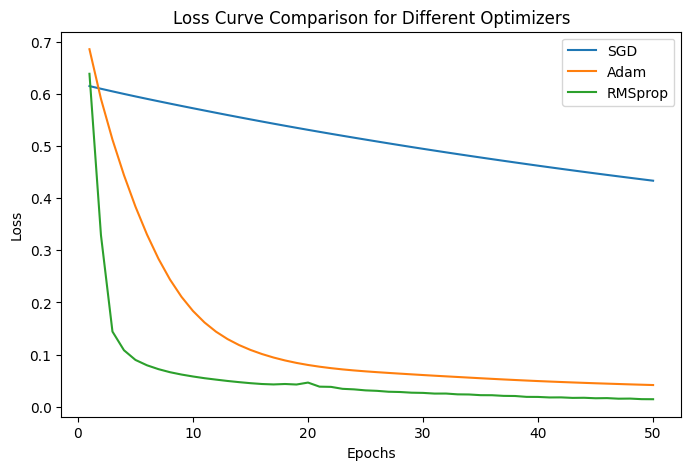

In [7]:

# Plot Loss Curves
plt.figure(figsize=(8, 5))
for name, loss in results.items():
    plt.plot(range(1, 51), loss, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison for Different Optimizers")
plt.legend()
plt.show()

In [8]:
# Test Model Accuracy
with torch.no_grad():
    test_outputs = model(X_test)
    _, predictions = torch.max(test_outputs, 1)
    accuracy = (predictions == y_test).sum().item() / y_test.size(0)

print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

✅ Model Accuracy: 97.37%


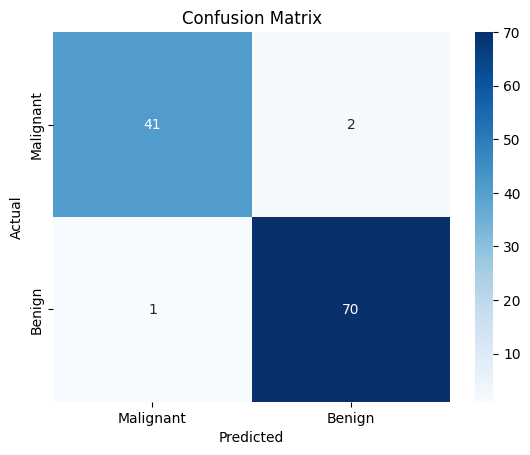

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Classification Report
print(" Classification Report:")
print(classification_report(y_test, predictions, target_names=['Malignant', 'Benign']))


 Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        43
      Benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
# Select 5 Random Test Samples
indices = random.sample(range(len(X_test)), 5)
sample_features = X_test[indices]
sample_labels = y_test[indices]

# Predict Using the Trained Model
with torch.no_grad():
    sample_outputs = model(sample_features)
    _, sample_predictions = torch.max(sample_outputs, 1)

# Print Results
print("\n🔍 Sample Predictions:")
for i in range(len(indices)):
    print(f"Sample {i+1}: Actual: {'Malignant' if sample_labels[i] == 0 else 'Benign'}, Predicted: {'Malignant' if sample_predictions[i] == 0 else 'Benign'}")



🔍 Sample Predictions:
Sample 1: Actual: Benign, Predicted: Benign
Sample 2: Actual: Malignant, Predicted: Malignant
Sample 3: Actual: Malignant, Predicted: Malignant
Sample 4: Actual: Benign, Predicted: Benign
Sample 5: Actual: Benign, Predicted: Benign
